In [35]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import pandas as pd
import numpy as np
import sys
from io import StringIO
import glob
if not hasattr(sys, "version_info") or sys.version_info < (3, 5):
  raise SystemExit("This program requires Python 3.5 or later.")
import csv
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import os
## https://github.com/ipython/ipyparallel
import ipyparallel as ipp
workers = ipp.Client()[:]
data_files = glob.glob("data[0-9][0-9][0-9].csv")
csvDelimiter = ";"
dataTypes = {'time': 'datetime64','humidity': 'float', 'temperature': 'float'}
dataHeaders = ['time','humidity', 'temperature']
data_files

['data000.csv', 'data001.csv', 'data002.csv', 'data003.csv', 'data004.csv']

In [36]:
%%time
## raw data merge

#dataPart = []
def readPart(fname):
    import numpy as np
    import pandas as pd
    from io import StringIO
    dataTypes = {'time': 'datetime64','humidity': 'float', 'temperature': 'float'}
    csvDelimiter = ";"
    with open(fname, 'r', newline='') as infile:
        indata = infile.read().replace(",", ".")
        return (fname, pd.read_csv(StringIO(indata), sep = csvDelimiter).astype(dataTypes))
    
parts = workers.map_async(readPart, [("%s/%s" % (os.getcwd(), f)) for f in data_files]).get()
npdata = []
frames = []
for filename, frame in parts:
    l = frame.values.tolist()
    frame.columns = dataHeaders
    frames.append(frame)
    npdata.extend(l)
    print("processed %s. lines %d. total lines %d" % (filename, len(l), len(npdata)))
temperature_data = pd.DataFrame(npdata)
temperature_data.columns = dataHeaders

processed /home/ed/repo/github/pyTest/dataSet/temperature/data000.csv. lines 250406. total lines 250406
processed /home/ed/repo/github/pyTest/dataSet/temperature/data001.csv. lines 274518. total lines 524924
processed /home/ed/repo/github/pyTest/dataSet/temperature/data002.csv. lines 247220. total lines 772144
processed /home/ed/repo/github/pyTest/dataSet/temperature/data003.csv. lines 192538. total lines 964682
processed /home/ed/repo/github/pyTest/dataSet/temperature/data004.csv. lines 301970. total lines 1266652
CPU times: user 5.92 s, sys: 67.7 ms, total: 5.99 s
Wall time: 51.7 s


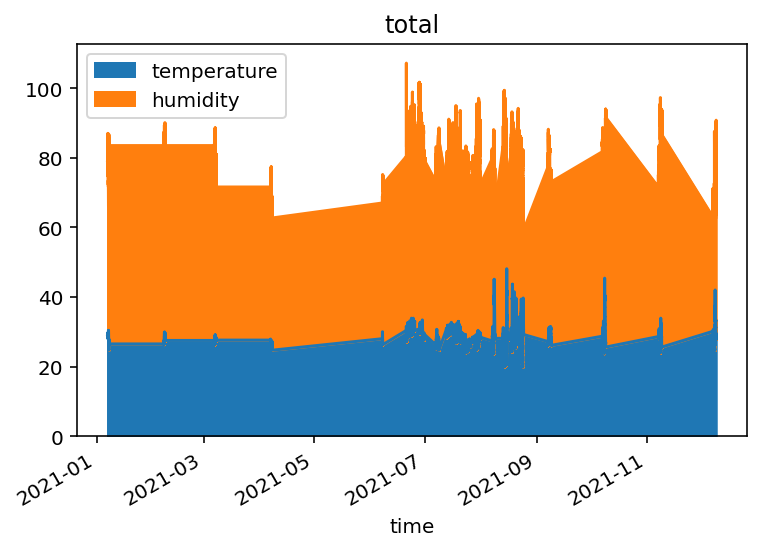

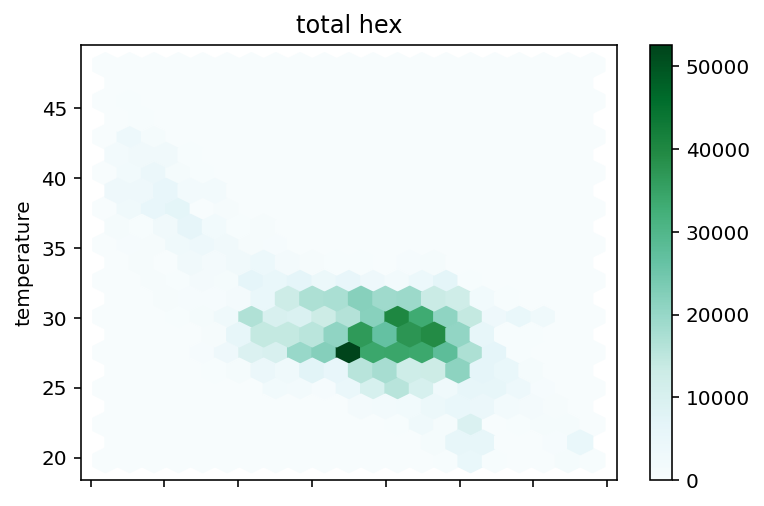

CPU times: user 11.6 s, sys: 261 ms, total: 11.8 s
Wall time: 11.8 s


In [37]:
%%time
temperature_data.plot.area(x="time", y=["temperature", "humidity"])
plt.title("total")
plt.show()
temperature_data.plot.hexbin(x="humidity", y="temperature", gridsize=20)
plt.title("total hex")
plt.show()

<AxesSubplot:>

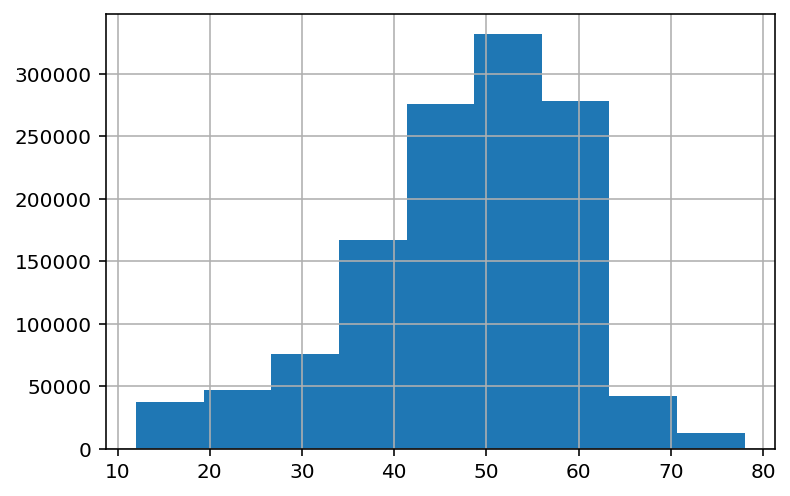

In [38]:
temperature_data['humidity'].hist(bins=9)

<AxesSubplot:>

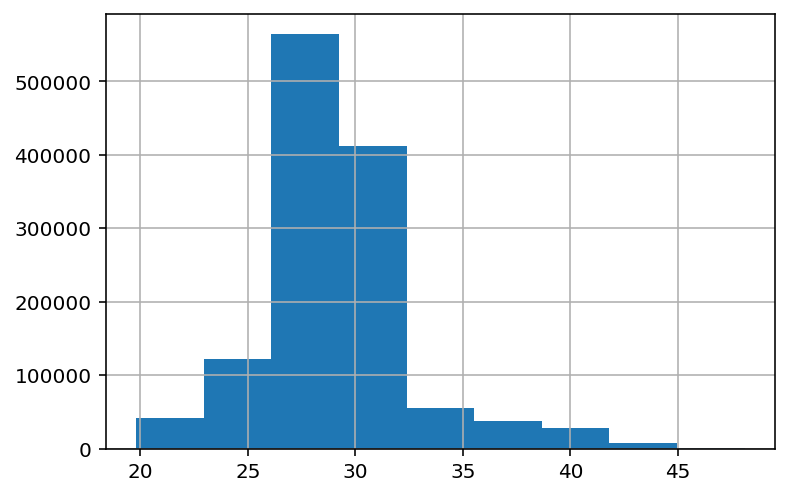

In [39]:
temperature_data['temperature'].hist(bins=9)

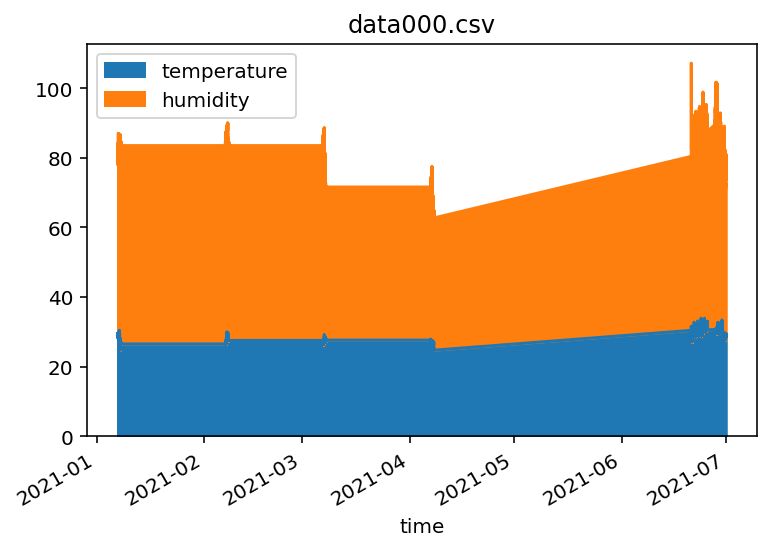

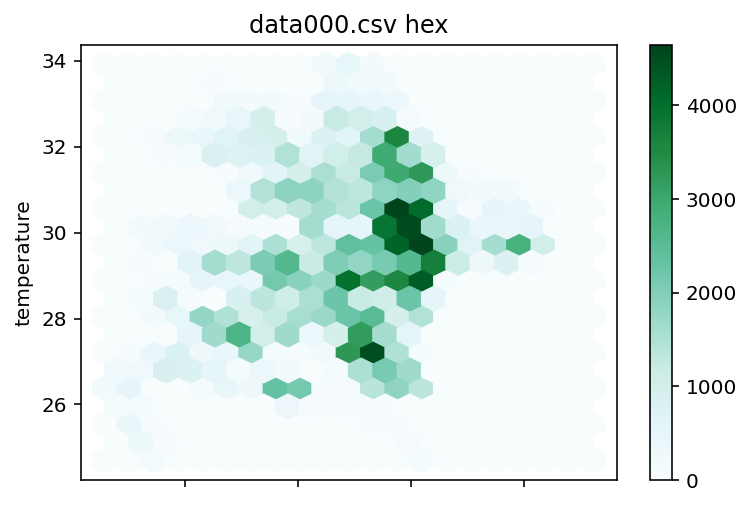

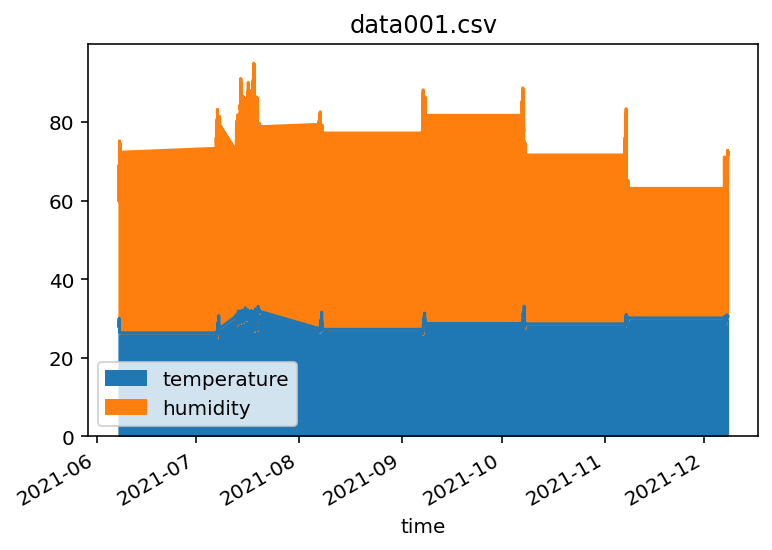

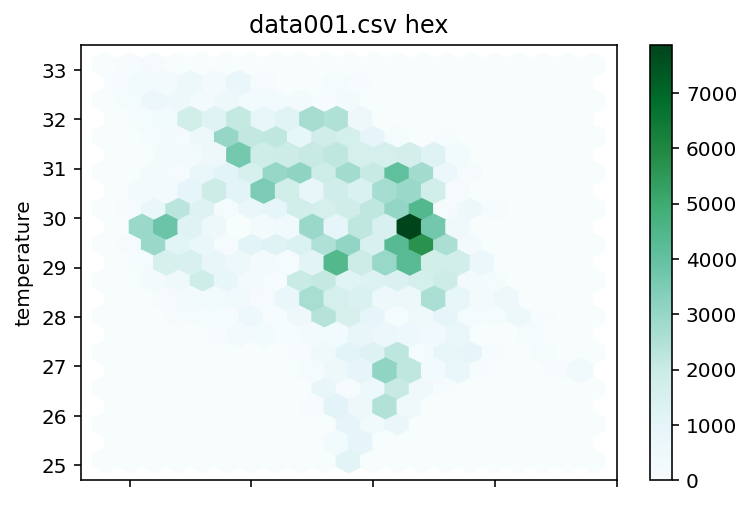

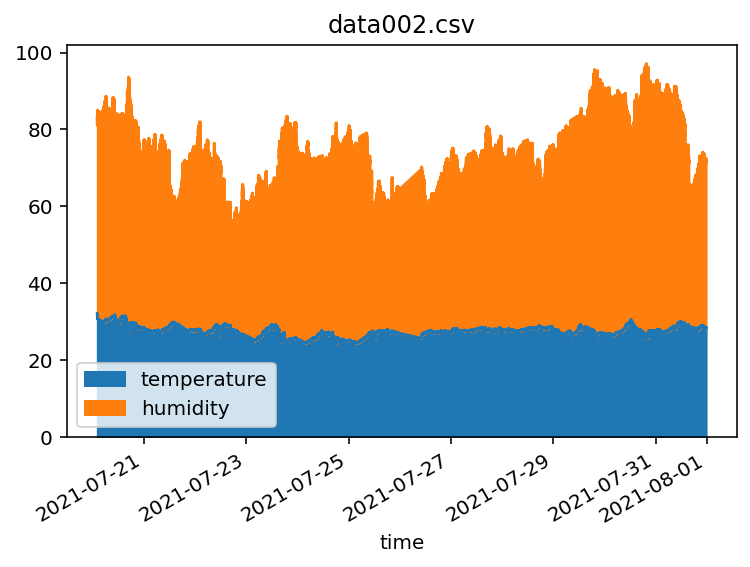

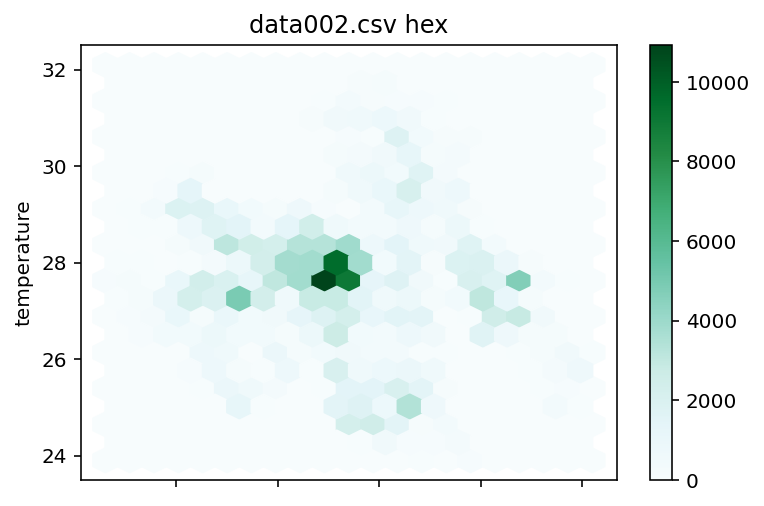

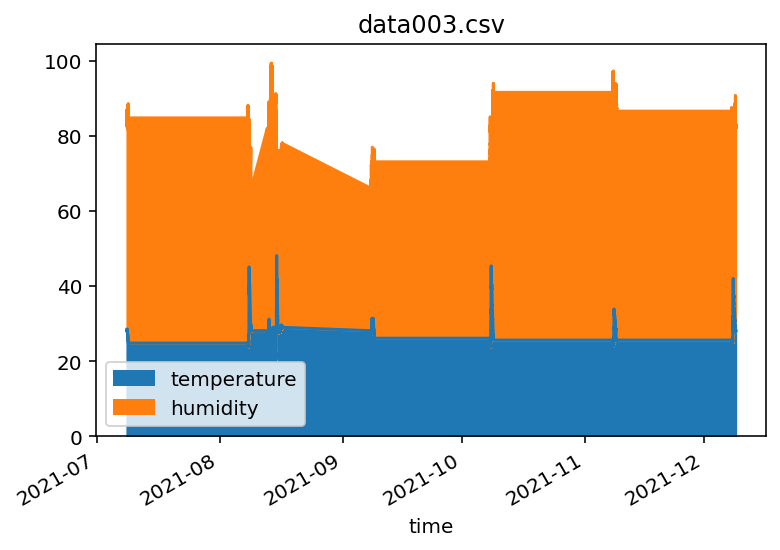

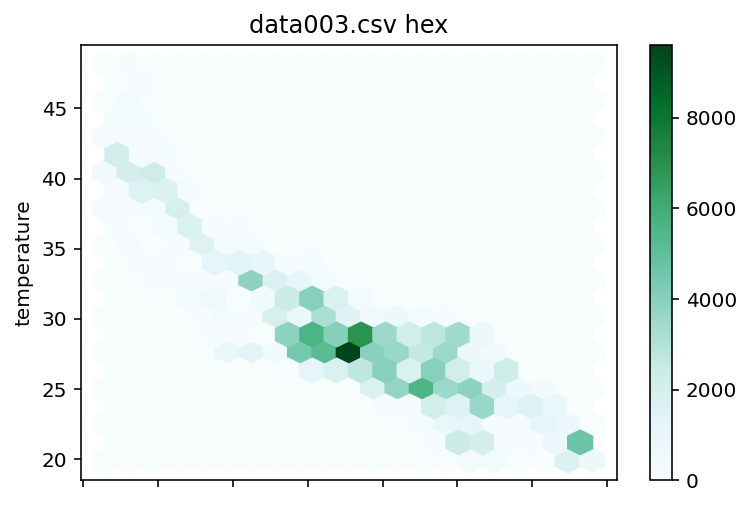

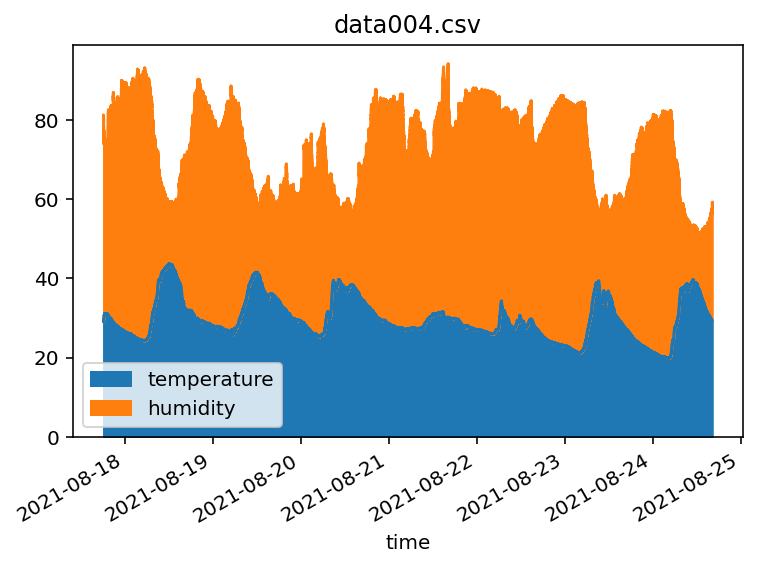

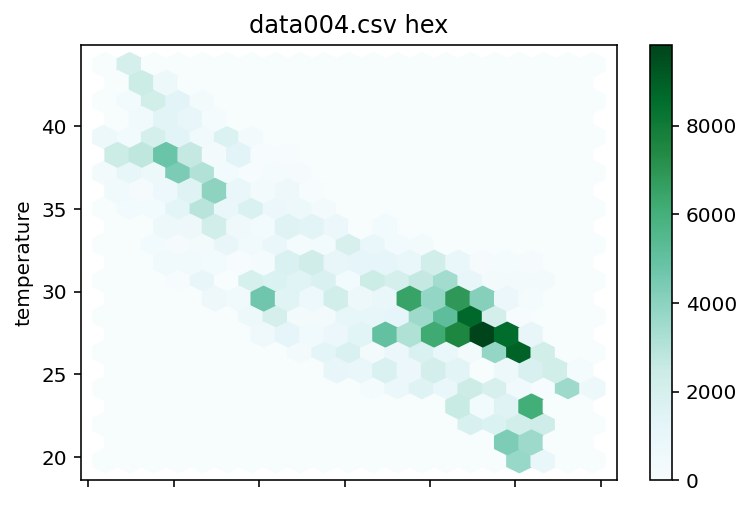

CPU times: user 14.6 s, sys: 384 ms, total: 15 s
Wall time: 15 s


In [40]:
%%time
i = 0
for frame in frames:
    frame.plot.area(x="time", y=["temperature", "humidity"])
    plt.title(data_files[i])
    plt.show()
    frame.plot.hexbin(x="humidity", y="temperature", gridsize=20)
    plt.title("%s hex" % data_files[i])
    plt.show()
    i += 1